In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [67]:
df = pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [69]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**FILLNA VALUES**

In [70]:
def fill(x):
  for col in x:
    df[col].fillna(df[col].mode()[0],inplace=True)
# Print remaining columns which still have NaN values
columns=['agent','country']
fill(columns)

In [71]:
df['children'] = df['children'].fillna(0)

In [72]:
df.drop(['company'],axis=1,inplace=True)

In [73]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [74]:
df['is_canceled'].describe()
#37.0% is canceled

count    119390.000000
mean          0.370416
std           0.482918
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: is_canceled, dtype: float64

**Visualization**

/Users/nikhilkale/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


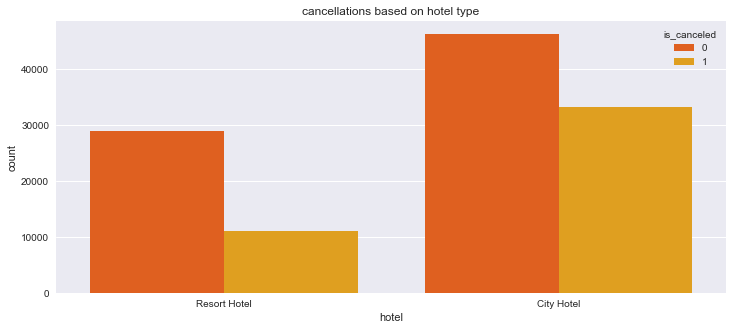

In [75]:
plt.figure(figsize=(12,5))
sns.countplot('hotel',data=df,hue='is_canceled',palette='autumn')
plt.title('cancellations based on hotel type')
plt.show()

0-booking
1-is_canceled

<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

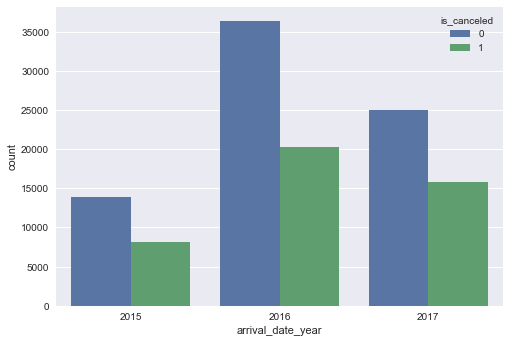

In [76]:
sns.countplot(data=df, x='arrival_date_year', hue='is_canceled')

/Users/nikhilkale/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nikhilkale/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


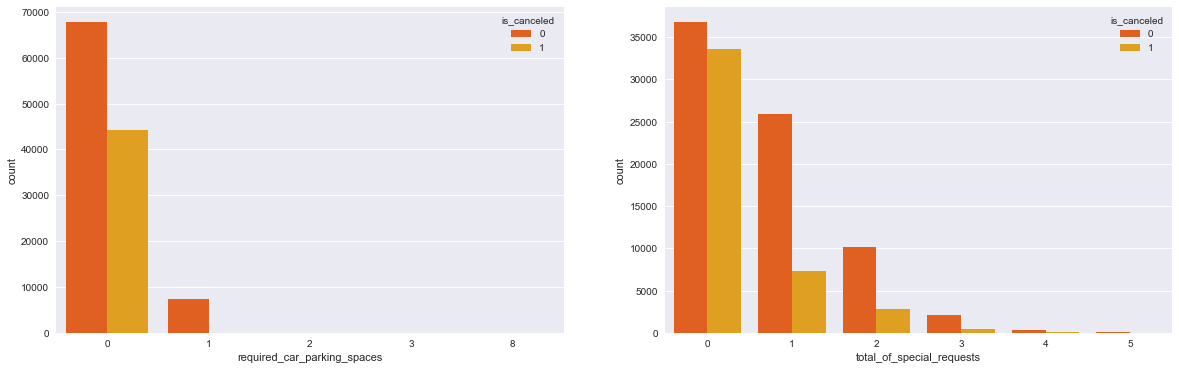

In [77]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.countplot('required_car_parking_spaces',data=df,hue='is_canceled',palette='autumn',ax=ax.flat[0])
sns.countplot('total_of_special_requests',data=df,hue='is_canceled',palette='autumn',ax=ax.flat[1])
plt.show()


most of the customers did not require any car parking spaces whereas there is some amount of customers with one car parking space needed.
total of special request have more zeros that means most of the customers has no special request whereas there is a commandable amount of customers that have one two and three special requests.

/Users/nikhilkale/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


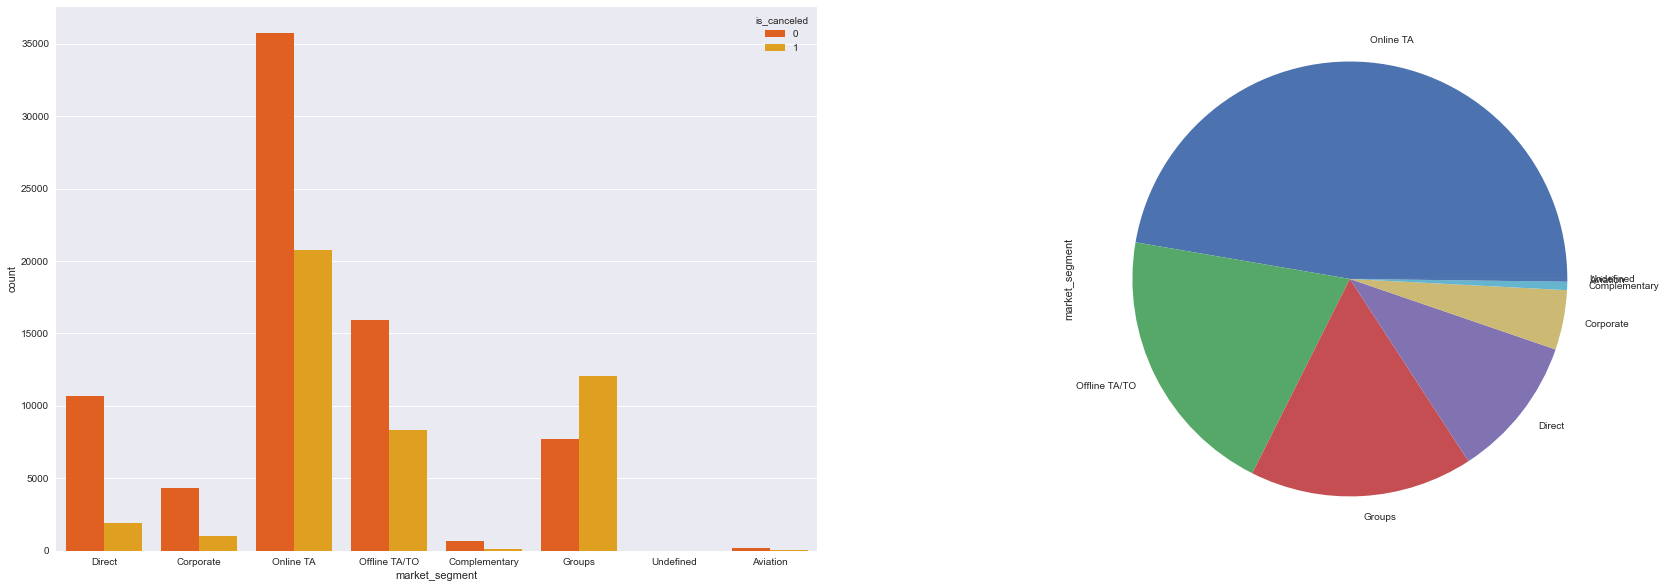

In [78]:
fig,ax=plt.subplots(1,2,figsize=(30,10))
sns.countplot('market_segment',data=df,hue='is_canceled',palette='autumn',ax=ax.flat[0])
plt.subplot(1,2,2)
df['market_segment'].value_counts().plot(kind='pie');
plt.show()

Online Travel Agents contribute most in the market segment and have the most bookings as well as most number of cancellations.

/Users/nikhilkale/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


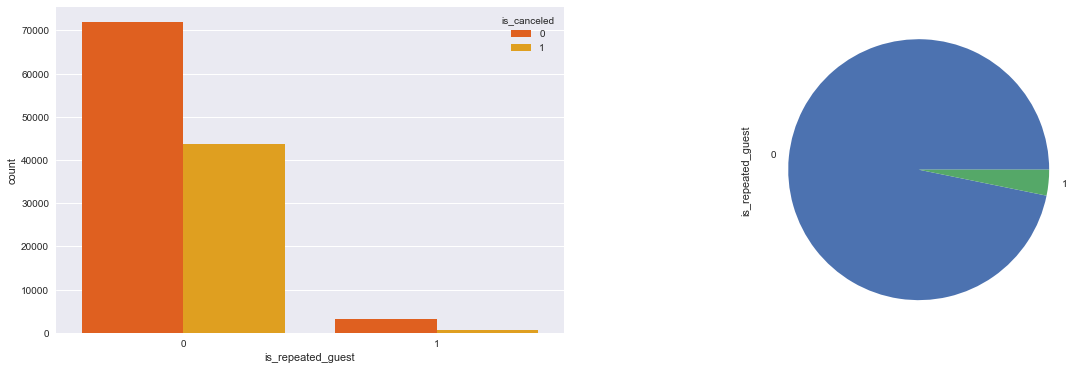

In [79]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.countplot('is_repeated_guest',data=df,hue='is_canceled',palette='autumn',ax=ax.flat[0])
(df['is_repeated_guest'].value_counts(normalize=True)*100).plot(kind='pie',ax=ax.flat[1])
plt.show()

Most of the guest were first time customers and the number of cancelled and non cancelled bookings are shared between them 

**Preprocessing**

In [80]:
df['child']=(df['children'] + df['babies']).astype(int)

In [81]:
df['total_booking']=df['previous_cancellations'] + df['previous_bookings_not_canceled']

In [82]:
def r_chnage(n):
  if n['assigned_room_type'] == n['reserved_room_type']:
    return False
  else:
    return True 

df['changes_room'] = df.apply(r_chnage,axis=1)    

In [83]:
df.drop(['reserved_room_type','assigned_room_type'],axis=1,inplace=True)

**LABEL_MAP**

In [84]:
month_map={'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06', 'July':'07', 'August':'08', 'September':'09', 'October':'10', 'November':'11', 'December':'12'}

df.arrival_date_month=df.arrival_date_month.map(month_map).astype(int)

In [85]:
df['arrival_date'] = df['arrival_date_year'].astype(str)+'-'+df['arrival_date_month'].astype(str)+'-'+df['arrival_date_day_of_month'].astype(str)

In [86]:
#CONVERT STRING INTO DATETIME
df['arrival_date']=pd.to_datetime(df['arrival_date'])
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [87]:
df['stay_duration'] = df['reservation_status_date'] - df['arrival_date']
df['stay_duration'] = df['stay_duration'] / np.timedelta64(1, 'D')
df['stay_duration'] = df['stay_duration'].astype(int)

**LABEL ENCODING**

In [88]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
var = ['customer_type', 'market_segment', 'distribution_channel', 'country']
for item in var:
    df[item] = lb.fit_transform(df[item])

In [89]:
df = pd.get_dummies(df, columns=['hotel', 'deposit_type', 'changes_room'])

In [90]:
df.drop(['meal','arrival_date','reservation_status_date','reservation_status','children','babies','previous_cancellations','previous_bookings_not_canceled'],axis=1,inplace=True)

In [91]:
df

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,country,...,child,total_booking,stay_duration,hotel_City Hotel,hotel_Resort Hotel,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,changes_room_False,changes_room_True
0,0,342,2015,7,27,1,0,0,2,135,...,0,0,0,0,1,1,0,0,1,0
1,0,737,2015,7,27,1,0,0,2,135,...,0,0,0,0,1,1,0,0,1,0
2,0,7,2015,7,27,1,0,1,1,59,...,0,0,1,0,1,1,0,0,0,1
3,0,13,2015,7,27,1,0,1,1,59,...,0,0,1,0,1,1,0,0,1,0
4,0,14,2015,7,27,1,0,2,2,59,...,0,0,2,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,8,35,30,2,5,2,15,...,0,0,7,1,0,1,0,0,1,0
119386,0,102,2017,8,35,31,2,5,3,56,...,0,0,7,1,0,1,0,0,1,0
119387,0,34,2017,8,35,31,2,5,2,43,...,0,0,7,1,0,1,0,0,1,0
119388,0,109,2017,8,35,31,2,5,2,59,...,0,0,7,1,0,1,0,0,1,0


Before normalization

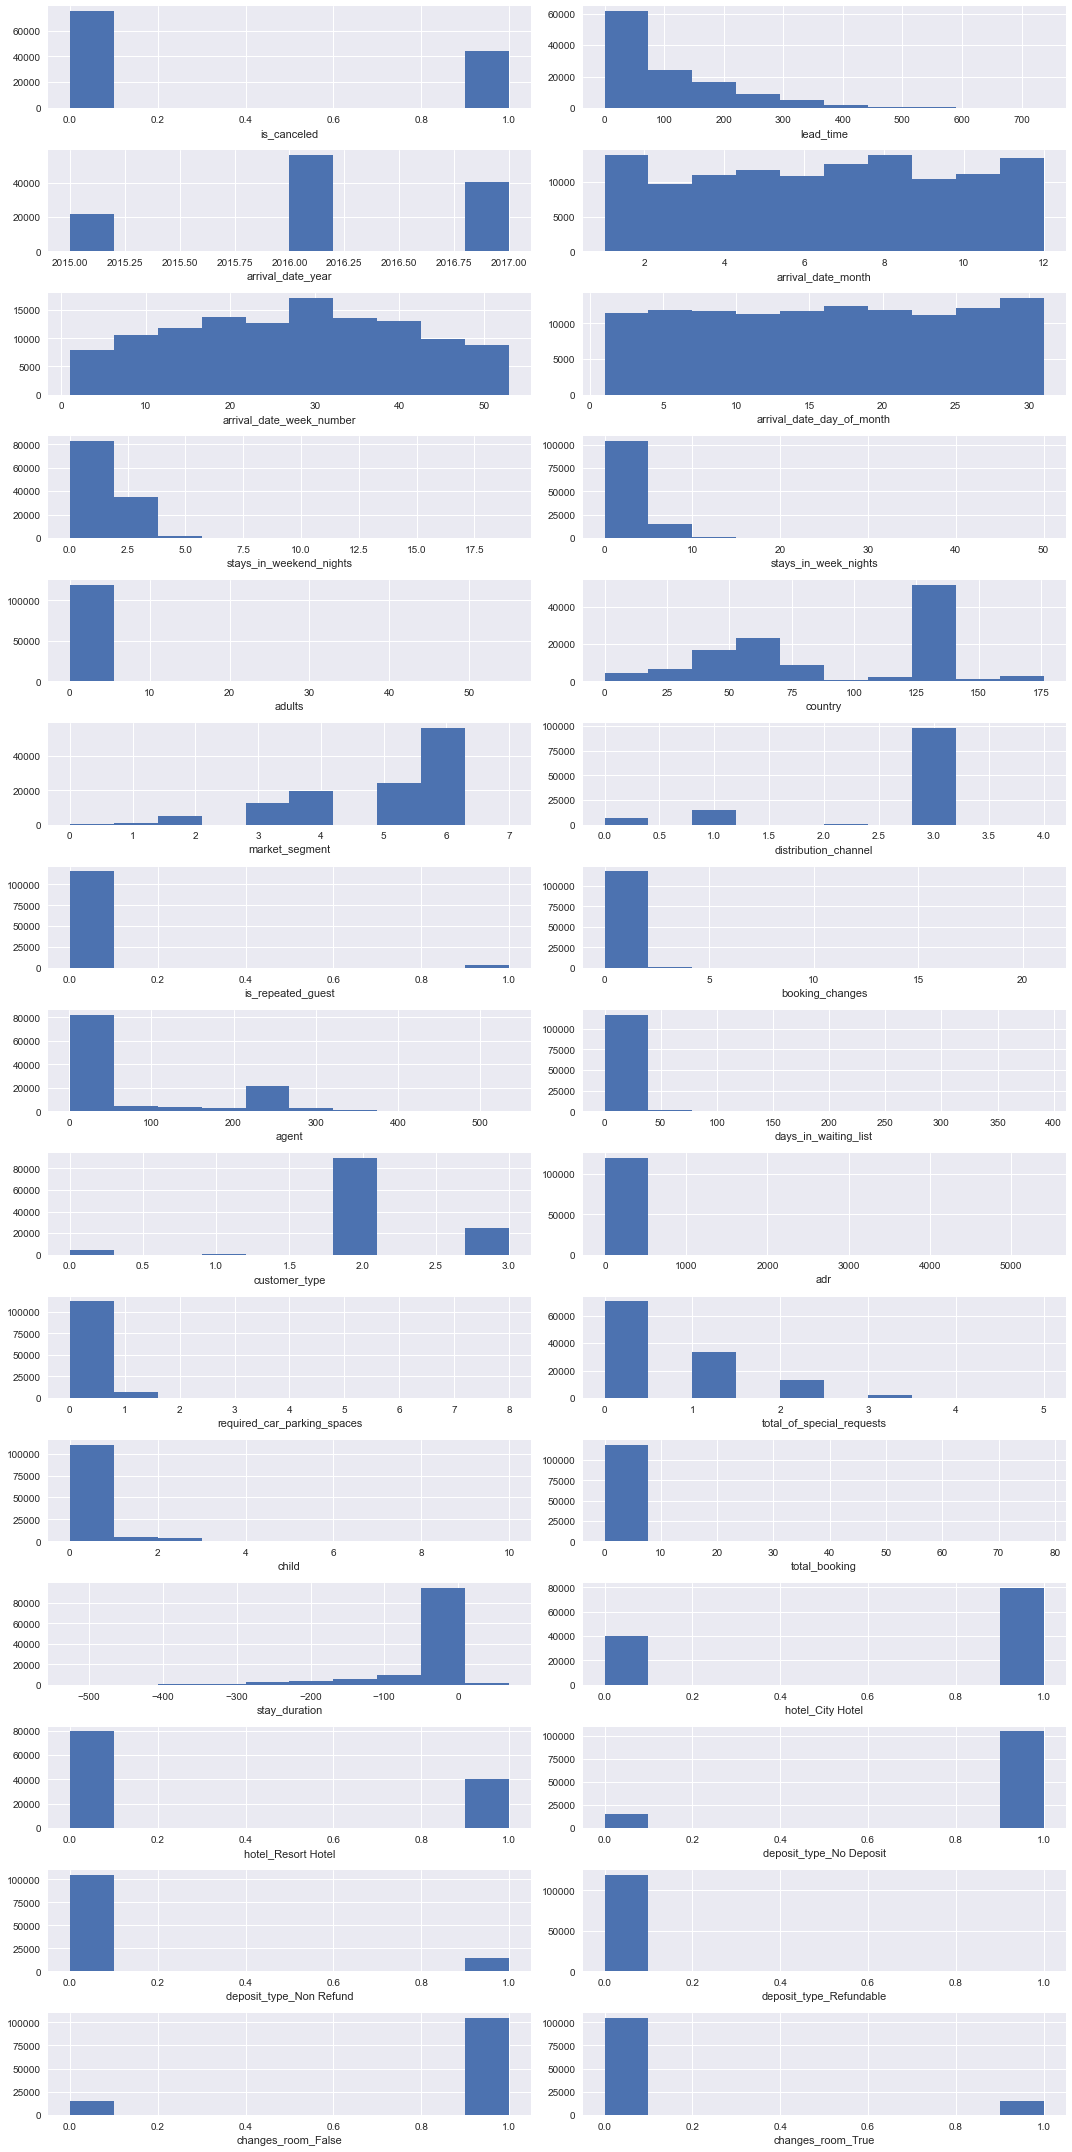

In [92]:
plt.figure(figsize=(15, 30))

for i, col in enumerate(df.columns,1):
    plt.subplot(15,2, i)
    df[col].hist()
    plt.xlabel(col)
plt.tight_layout()

In [93]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,country,...,child,total_booking,stay_duration,hotel_City Hotel,hotel_Resort Hotel,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,changes_room_False,changes_room_True
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,6.552483,27.165173,15.798241,0.927599,2.500302,1.856403,93.161789,...,0.111835,0.224215,-29.677058,0.664461,0.335539,0.876464,0.122179,0.001357,0.875057,0.124943
std,0.482918,106.863097,0.707476,3.090619,13.605138,8.780829,0.998613,1.908286,0.579261,44.665422,...,0.412561,1.827956,70.068018,0.472181,0.472181,0.329053,0.327494,0.036811,0.330656,0.330656
min,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-526.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,2.000000,56.000000,...,0.000000,0.000000,-26.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,69.000000,2016.000000,7.000000,28.000000,16.000000,1.000000,2.000000,2.000000,81.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,160.000000,2017.000000,9.000000,38.000000,23.000000,2.000000,3.000000,2.000000,135.000000,...,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,737.000000,2017.000000,12.000000,53.000000,31.000000,19.000000,50.000000,55.000000,176.000000,...,10.000000,78.000000,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


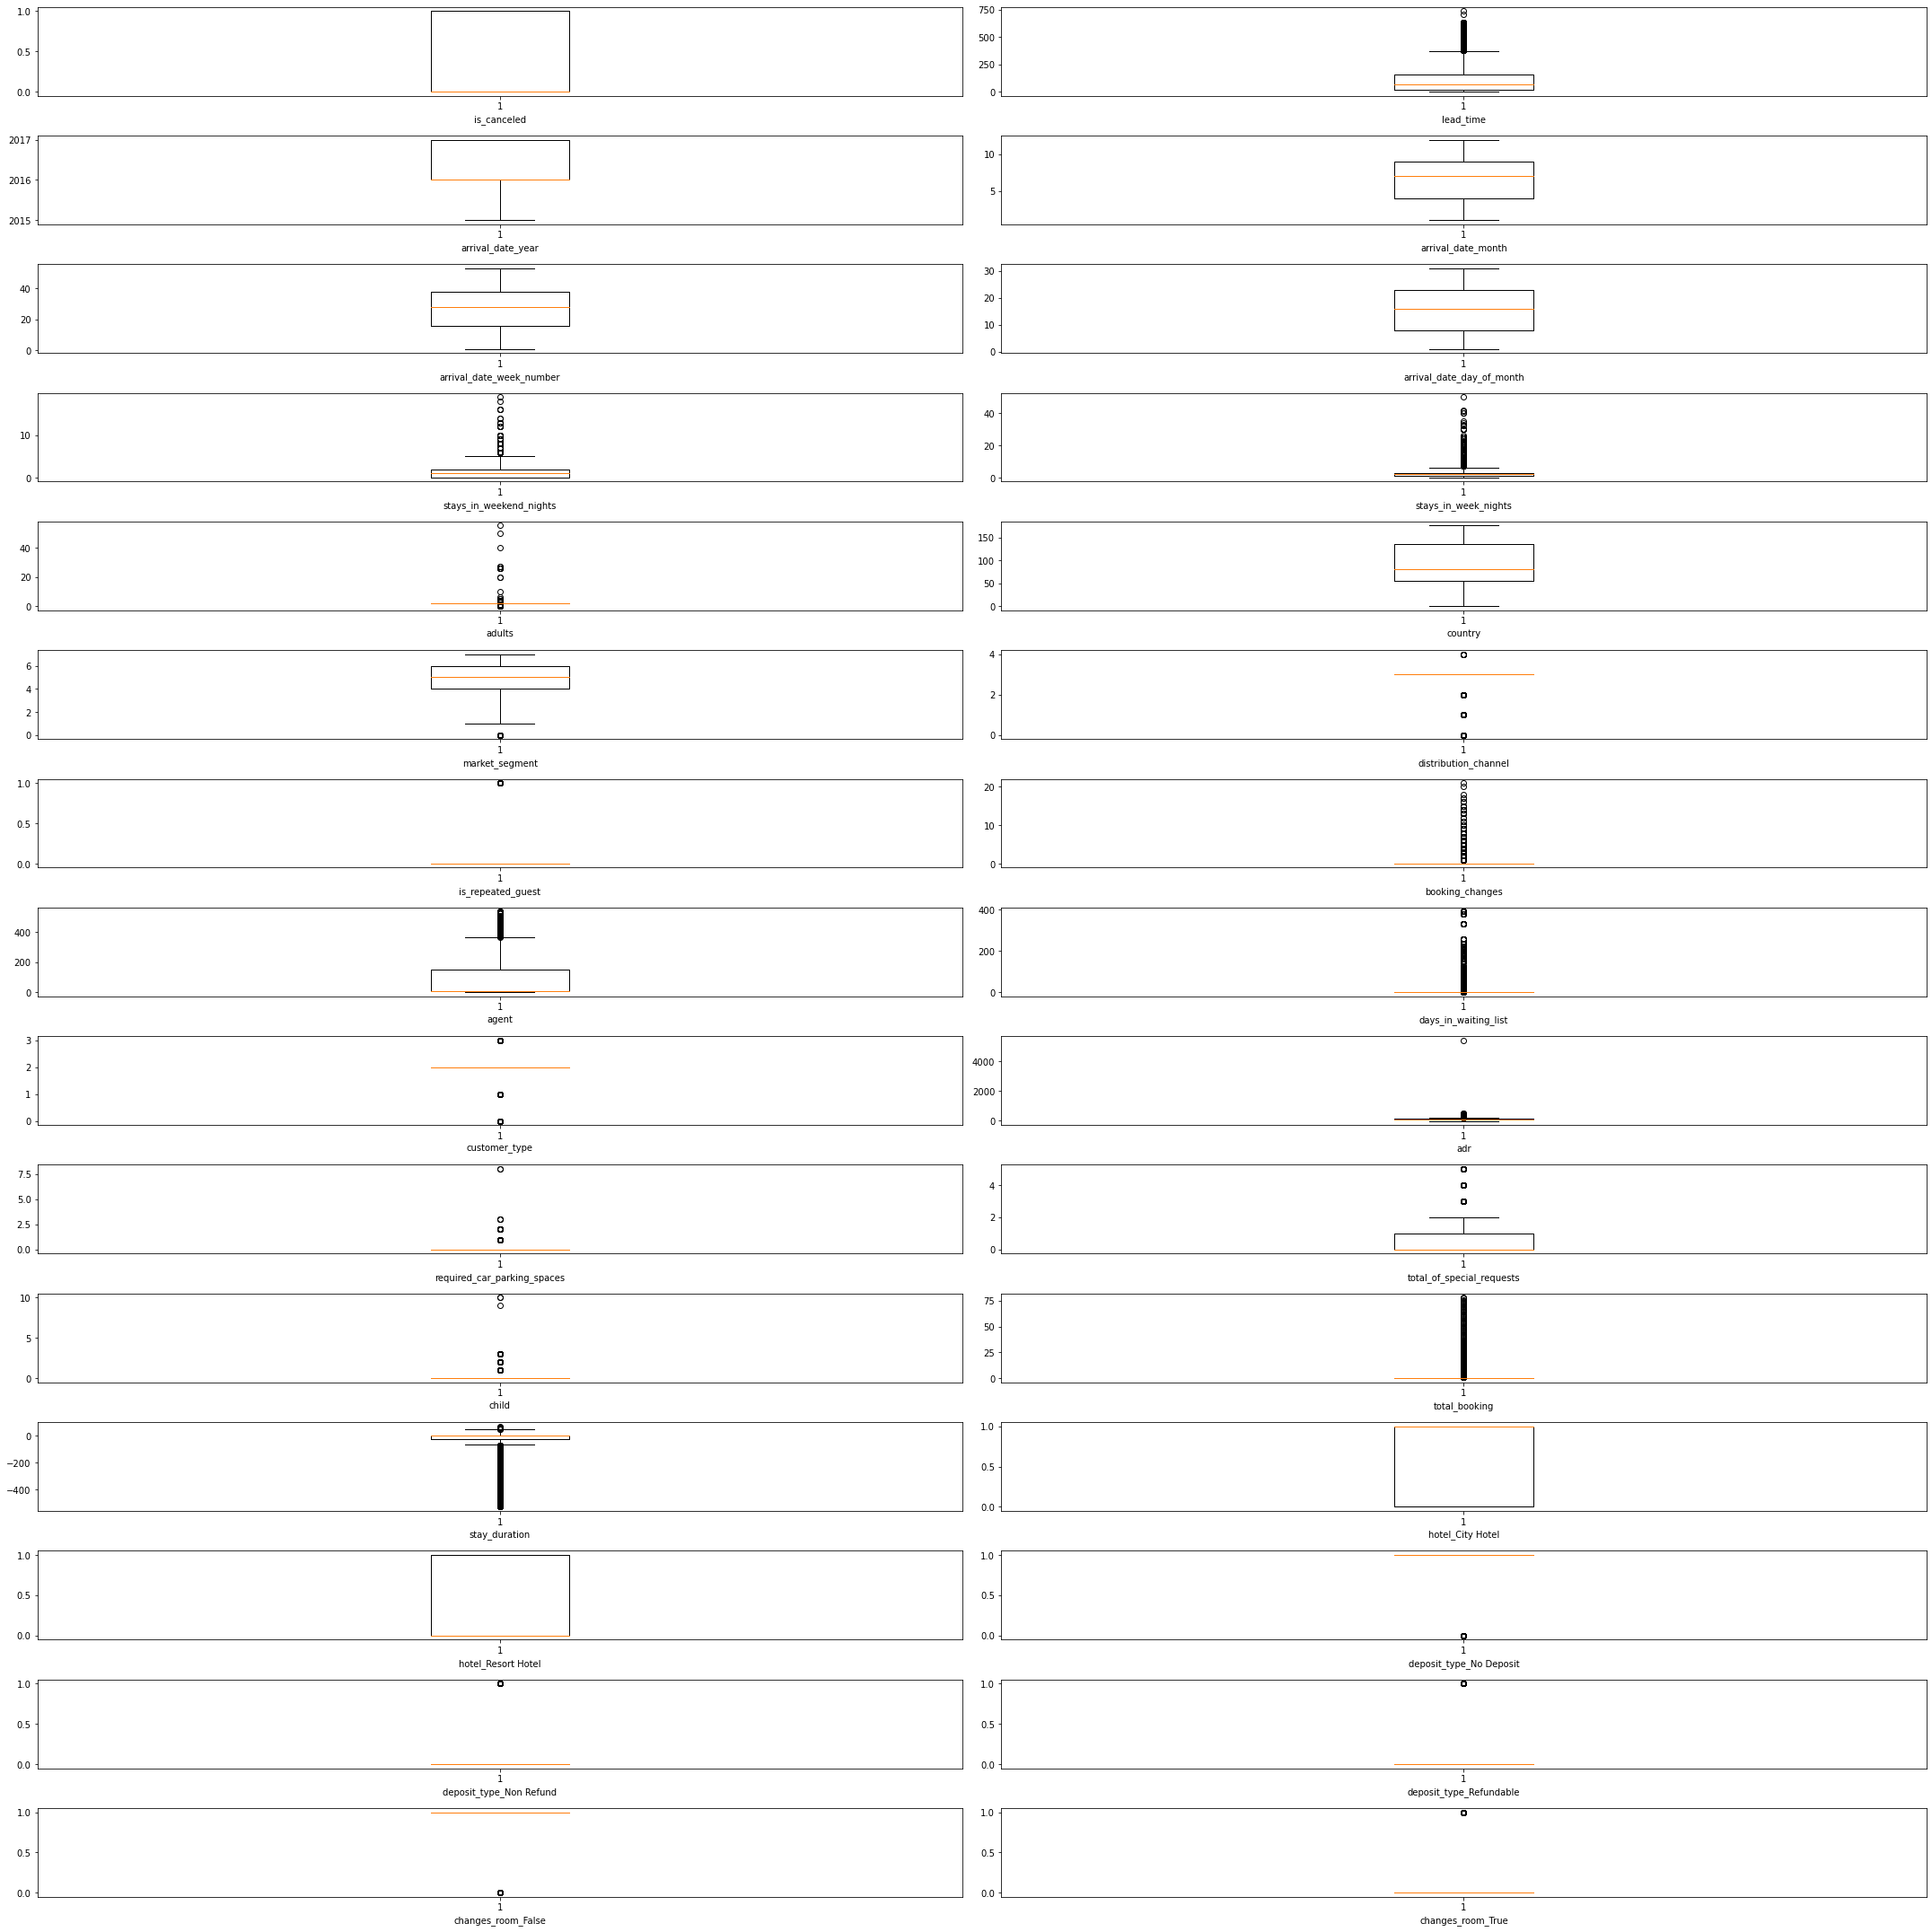

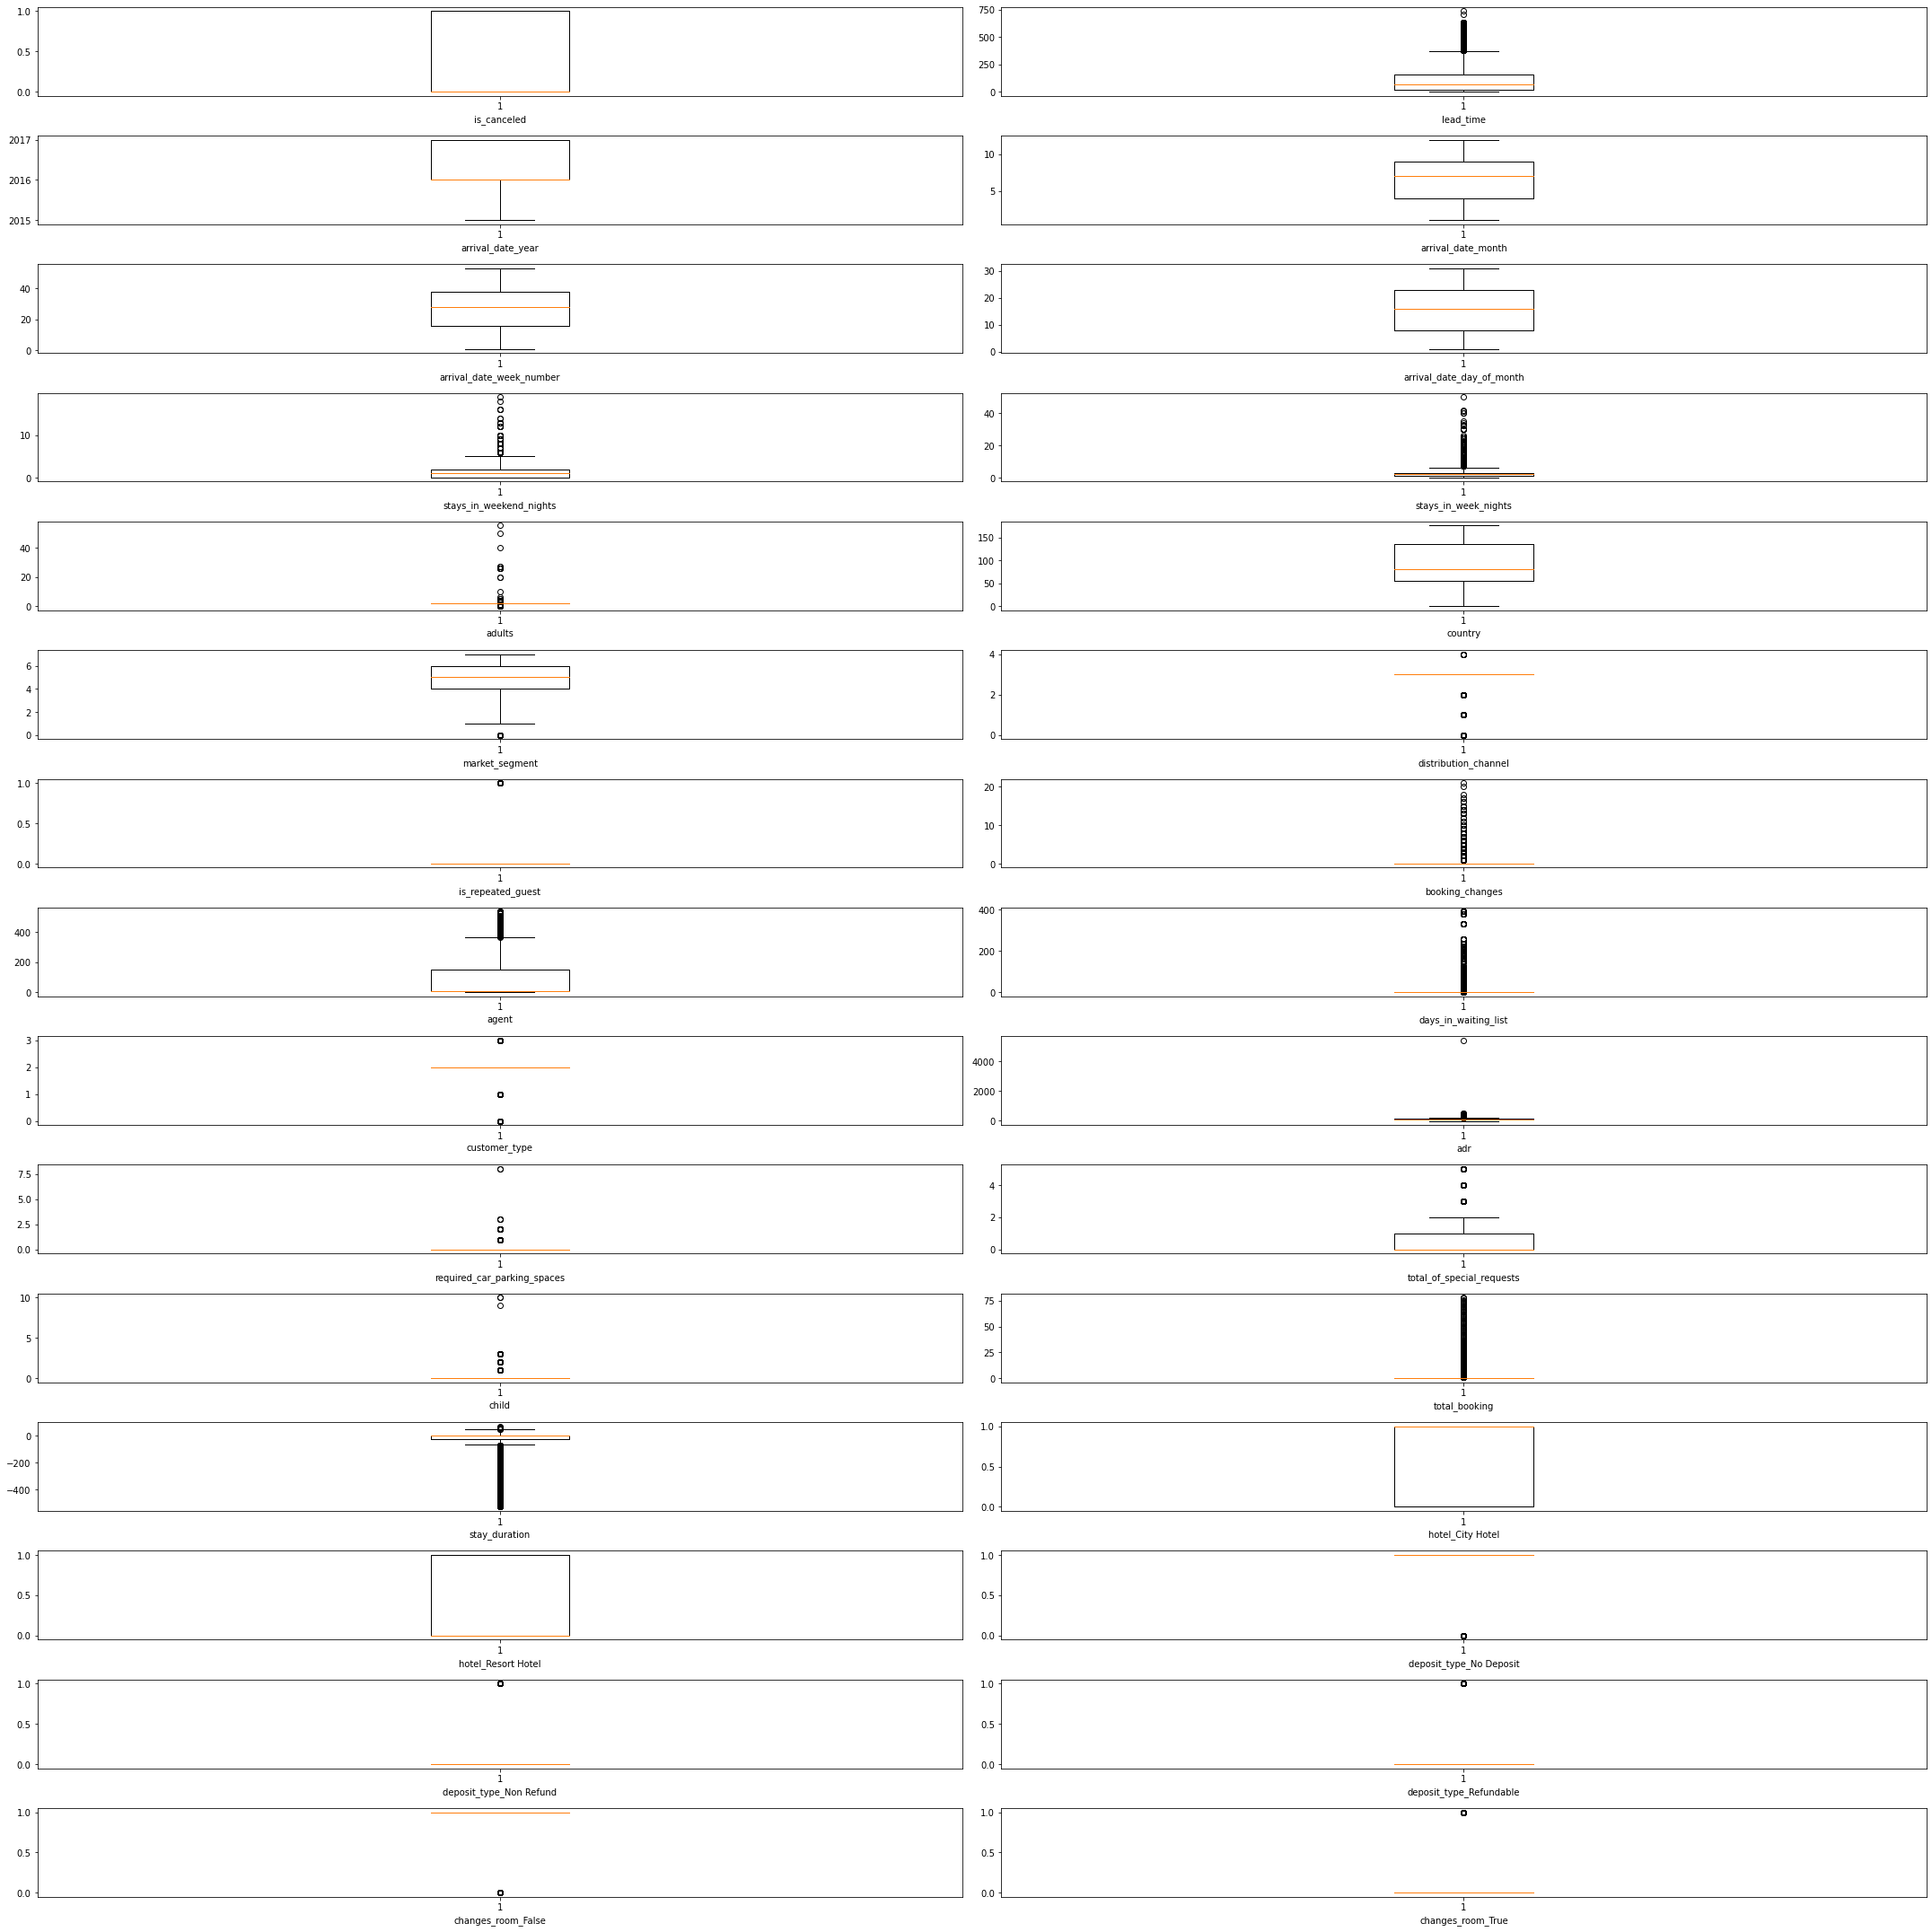

In [30]:
plt.figure(figsize=(30, 30))

for i, col in enumerate(df.columns,1):
    plt.subplot(15,2, i)
    plt.boxplot(df[col])
    plt.xlabel(col)
plt.tight_layout()

**TRAIN TEST DATA**

In [94]:
df.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'booking_changes', 'agent', 'days_in_waiting_list', 'customer_type',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'child', 'total_booking', 'stay_duration', 'hotel_City Hotel',
       'hotel_Resort Hotel', 'deposit_type_No Deposit',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'changes_room_False', 'changes_room_True'],
      dtype='object')

In [95]:
X = df.drop(['is_canceled'],axis=1)
Y = df['is_canceled']

In [96]:
X.shape,Y.shape

((119390, 29), (119390,))

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    X,Y,test_size=0.30,random_state=90
)



In [98]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((83573, 29), (83573,), (35817, 29), (35817,))

Data scaling

In [99]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
x_train = mm_scaler.transform(X_train)
x_test = mm_scaler.transform(X_test)

After normalization hist 

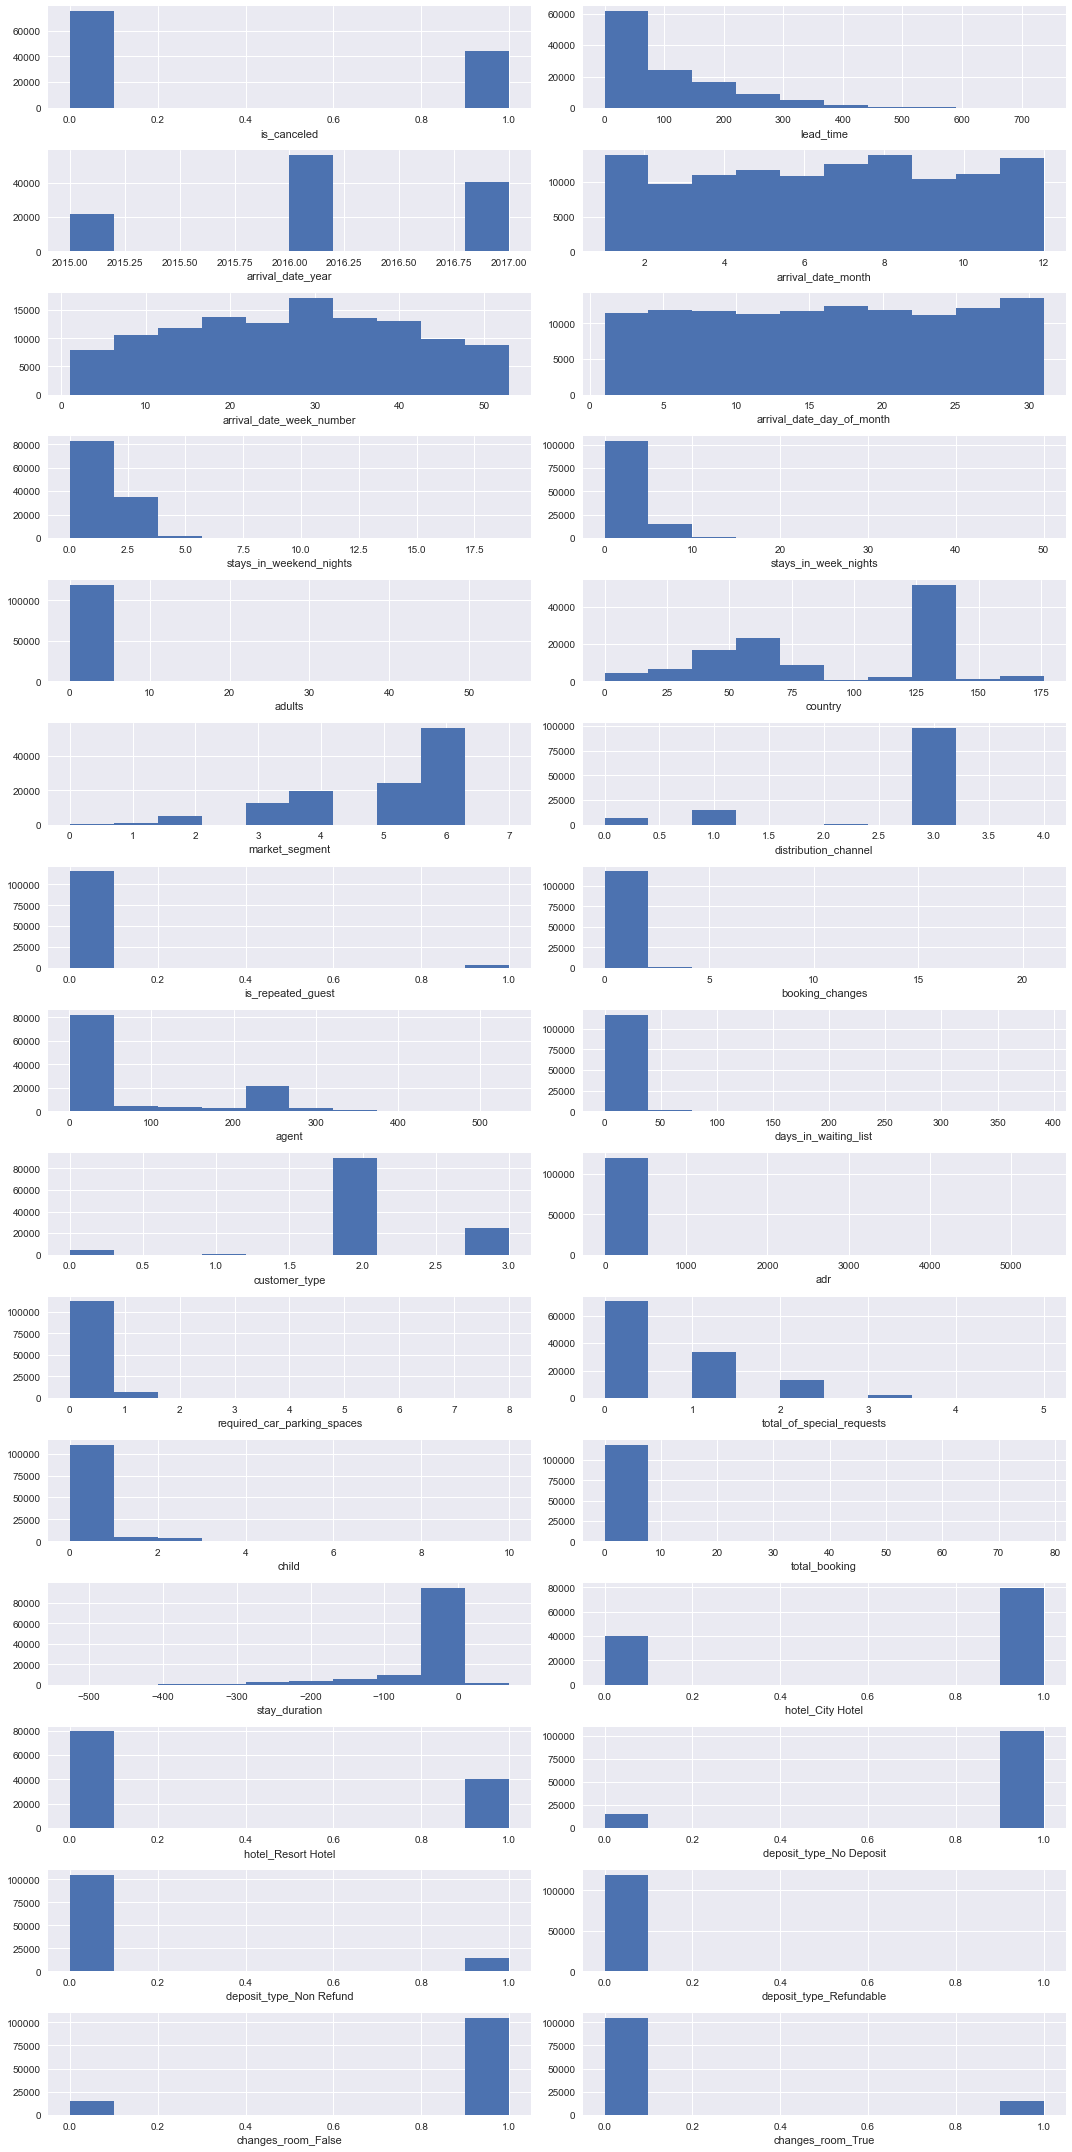

In [100]:
plt.figure(figsize=(15, 30))

for i, col in enumerate(df.columns,1):
    plt.subplot(15,2, i)
    df[col].hist()
    plt.xlabel(col)
plt.tight_layout()

**Logistic Regression**

In [101]:
import statsmodels.api as sm
log_reg_model=sm.GLM(y_train,(sm.add_constant(x_train)),family=sm.families.Binomial())
log_reg_model.fit().summary()

/Users/nikhilkale/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/Users/nikhilkale/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/nikhilkale/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:893: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
/Users/nikhilkale/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/Users/nikhilkale/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:893: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/Users/nikhilka

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            is_canceled   No. Observations:                83573
Model:                            GLM   Df Residuals:                    83546
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 31 Mar 2021   Deviance:                          nan
Time:                        10:45:10   Pearson chi2:                 5.06e+19
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.975e+25   7.32e+18   1.09e+07      0.000    7.97e+25    7.97e+25
x1          2.646e+14   2.18e+06   1.21e+08      0.000    2.65e+14    2.65e+14
x2          1.338e+14   9.54e+05    1.4e+08      0.000    1.34e+14    1.34e+14
x3          7.595e+13    2.8e+07   2.71e+06      0.000     7.6e+13     7.6e+13
x4         -1.151e+12   3.04e+07  -3.78e+04      0.000   -1.15e+12   -1.15e+12
x5           6.86e+13   2.64e+06    2.6e+07      0.000    6.86e+13    6.86e+13
x6          1.271e+15   5.22e+06   2.44e+08      0.000    1.27e+15    1.27e+15
x7          3.974e+15   7.34e+06   5.41e+08      0.000    3.97e+15    3.97e+15
x8          2.515e+15   2.28e+07    1.1e+08      0.000    2.51e+15    2.51e+15
x9         -1.628e+15   1.03e+06  -1.58e+09      0.000   -1.63e+15   -1.63e+15
x10        -4.932e+12   2.42e+06  -2.04e+06      0.000   -4.93e+12   -4.93e+12
x11         2.503e+14   1.86e+06   1.34e+08      0.000     2.5e+14     2.5e+14
x12         8.545e+14   1.51e+06   5.66e+08      0.000    8.54e+14    8.54e+14
x13         2.142e+14   6.63e+06   3.23e+07      0.000    2.14e+14    2.14e+14
x14         1.798e+14   1.64e+06    1.1e+08      0.000     1.8e+14     1.8e+14
x15         4.951e+14   5.41e+06   9.14e+07      0.000    4.95e+14    4.95e+14
x16         1.357e+14   1.32e+06   1.03e+08      0.000    1.36e+14    1.36e+14
x17         3.306e+15   2.87e+07   1.15e+08      0.000    3.31e+15    3.31e+15
x18        -8.495e+15   7.89e+06  -1.08e+09      0.000   -8.49e+15   -8.49e+15
x19         4.294e+14   1.63e+06   2.63e+08      0.000    4.29e+14    4.29e+14
x20          7.57e+14   5.97e+06   1.27e+08      0.000    7.57e+14    7.57e+14
x21        -1.127e+15   1.11e+07  -1.01e+08      0.000   -1.13e+15   -1.13e+15
x22        -2.448e+16   2.79e+06  -8.76e+09      0.000   -2.45e+16   -2.45e+16
x23         1.063e+26   9.76e+18   1.09e+07      0.000    1.06e+26    1.06e+26
x24         1.063e+26   9.76e+18   1.09e+07      0.000    1.06e+26    1.06e+26
x25        -7.336e+25   6.73e+18  -1.09e+07      0.000   -7.34e+25   -7.34e+25
x26        -7.336e+25   6.73e+18  -1.09e+07      0.000   -7.34e+25   -7.34e+25
x27        -7.336e+25   6.73e+18  -1.09e+07      0.000   -7.34e+25   -7.34e+25
x28        -1.127e+26   1.03e+19  -1.09e+07      0.000   -1.13e+26   -1.13e+26
x29        -1.127e+26   1.03e+19  -1.09e+07      0.000   -1.13e+26   -1.13e+26
==============================================================================
"""

<AxesSubplot:>

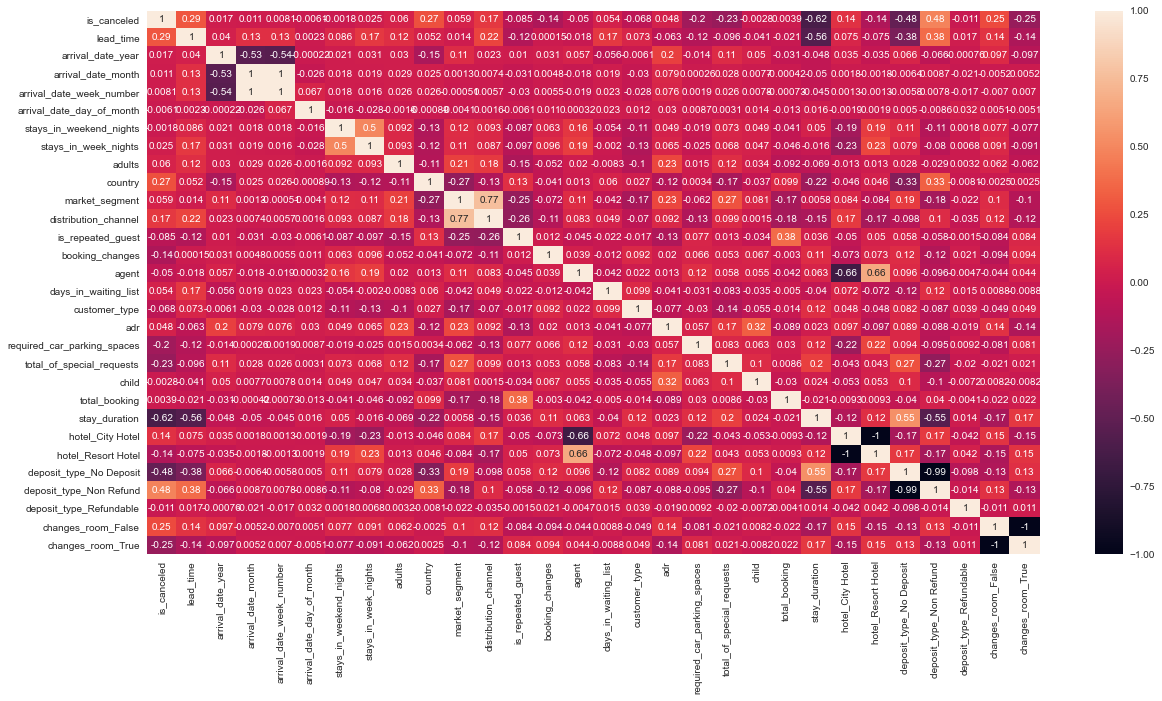

In [102]:
%matplotlib inline
plt.figure( figsize= (20,10))
sns.heatmap(df.corr(),annot=True)


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
logreg = LogisticRegression(max_iter=500).fit(x_train, y_train)
#scores = cross_val_score(logreg, x_train, y_train, cv=5)
logreg_pred = logreg.predict(x_test)
logreg_prob = logreg.predict_proba(x_test)

In [43]:
from sklearn import metrics
confusion=metrics.confusion_matrix(y_test, logreg_pred)
confusion

array([[22665,    19],
       [ 2072, 11061]])

array([[22665,    19],
       [ 2072, 11061]])

In [44]:
print("Accuracy =",metrics.accuracy_score(y_test,logreg_pred))
print("recall   =",metrics.recall_score(y_test,logreg_pred))
print("precision=",metrics.precision_score(y_test,logreg_pred))
print("f1_score =",metrics.f1_score(y_test,logreg_pred))

Accuracy = 0.9416199011642516
recall   = 0.8422294982106144
precision= 0.9982851985559567
f1_score = 0.9136414322884401
Accuracy = 0.9416199011642516
recall   = 0.8422294982106144
precision= 0.9982851985559567
f1_score = 0.9136414322884401


In [45]:
# predict probabilities
logreg_prob = logreg.predict_proba(x_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, logreg_prob[:,1], pos_label=1)
# auc scores
auc_score1 = roc_auc_score(y_test, logreg_prob[:,1])
print(auc_score1)


0.9855742243305112
0.9855742243305112


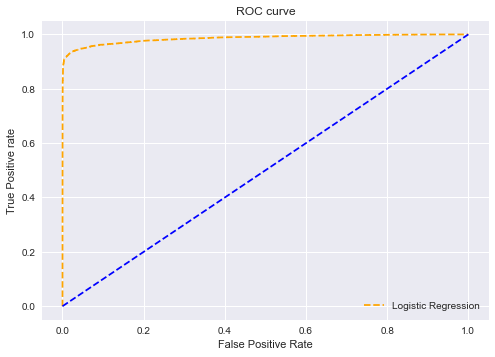

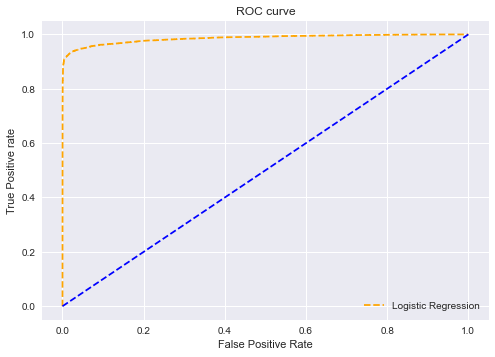

In [46]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# **Support vector machine**

In [47]:
from sklearn.svm import SVC
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  

In [48]:
model = SVC(C=1)
model.fit(x_train,y_train)
y_pred_svc=model.predict(x_test)

In [49]:
from sklearn import metrics
confusion1=metrics.confusion_matrix(y_test,y_pred_svc)
confusion1

array([[22676,     8],
       [ 2072, 11061]])

array([[22676,     8],
       [ 2072, 11061]])

In [50]:
print("Accuracy",metrics.accuracy_score(y_test,y_pred_svc))
print("recall=",metrics.recall_score(y_test,y_pred_svc))
print("prec=",metrics.precision_score(y_test,y_pred_svc))

Accuracy 0.9419270178965296
recall= 0.8422294982106144
prec= 0.9992772608185021
Accuracy 0.9419270178965296
recall= 0.8422294982106144
prec= 0.9992772608185021


In [51]:
from sklearn.model_selection import KFold
folds=KFold(n_splits=5,shuffle=True,random_state=4)

In [52]:
from sklearn.model_selection import cross_val_score
model=SVC(C=1)
cross_val=cross_val_score(model,x_train,y_train, cv = folds,scoring='accuracy')

In [53]:
print(cross_val)
print("mean_accuracy={}".format(cross_val.mean()))

[0.93466946 0.93496859 0.93616512 0.93520402 0.938734  ]
mean_accuracy=0.9359482373678258
[0.93466946 0.93496859 0.93616512 0.93520402 0.938734  ]
mean_accuracy=0.9359482373678258


In [54]:
from sklearn.model_selection import GridSearchCV
params={'C':[0.1,1,10,100,1000]}
model =SVC()

model_cv=GridSearchCV(model,param_grid=params,
                      cv=folds,verbose=1,return_train_score=True)

In [55]:
model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 102.2min finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 102.2min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             return_train_score=True, verbose=1)

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             return_train_score=True, verbose=1)

In [56]:
cv_result=pd.DataFrame(model_cv.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,151.276255,1.653583,17.462669,0.559438,0.1,{'C': 0.1},0.875262,0.870894,0.873467,0.874536,...,0.874649,0.002666,5,0.874735,0.875841,0.874226,0.874617,0.874033,0.874690,0.000629
1,203.329731,4.982269,11.670912,1.291664,1,{'C': 1},0.934669,0.934969,0.936165,0.935204,...,0.935948,0.001480,4,0.936358,0.936313,0.936029,0.936344,0.935267,0.936062,0.000415
2,251.185022,11.162736,7.785284,1.521346,10,{'C': 10},0.972360,0.969488,0.973018,0.971820,...,0.972395,0.001874,3,0.972359,0.973242,0.972344,0.972689,0.971896,0.972506,0.000446
3,215.819652,14.800449,3.453345,0.768340,100,{'C': 100},0.987197,0.986001,0.986958,0.986538,...,0.987089,0.000925,2,0.987421,0.987660,0.987466,0.987661,0.987152,0.987472,0.000188
4,198.729339,10.819328,1.942175,0.137563,1000,{'C': 1000},0.992163,0.992223,0.993180,0.993120,...,0.992952,0.000707,1,0.994152,0.994316,0.994331,0.994197,0.993913,0.994182,0.000151


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,151.276255,1.653583,17.462669,0.559438,0.1,{'C': 0.1},0.875262,0.870894,0.873467,0.874536,...,0.874649,0.002666,5,0.874735,0.875841,0.874226,0.874617,0.874033,0.874690,0.000629
1,203.329731,4.982269,11.670912,1.291664,1,{'C': 1},0.934669,0.934969,0.936165,0.935204,...,0.935948,0.001480,4,0.936358,0.936313,0.936029,0.936344,0.935267,0.936062,0.000415
2,251.185022,11.162736,7.785284,1.521346,10,{'C': 10},0.972360,0.969488,0.973018,0.971820,...,0.972395,0.001874,3,0.972359,0.973242,0.972344,0.972689,0.971896,0.972506,0.000446
3,215.819652,14.800449,3.453345,0.768340,100,{'C': 100},0.987197,0.986001,0.986958,0.986538,...,0.987089,0.000925,2,0.987421,0.987660,0.987466,0.987661,0.987152,0.987472,0.000188
4,198.729339,10.819328,1.942175,0.137563,1000,{'C': 1000},0.992163,0.992223,0.993180,0.993120,...,0.992952,0.000707,1,0.994152,0.994316,0.994331,0.994197,0.993913,0.994182,0.000151


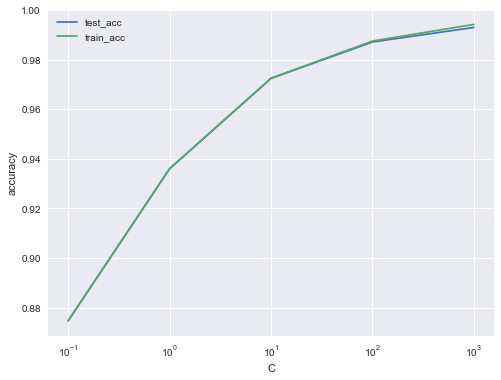

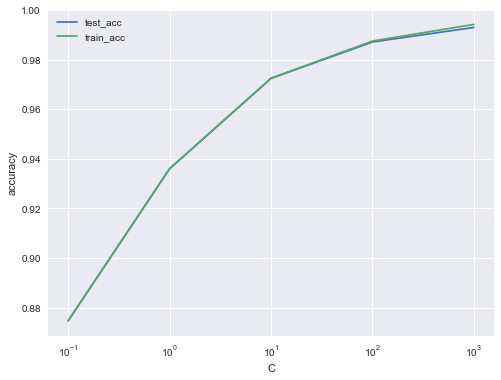

In [57]:
plt.figure(figsize=(8,6))
plt.plot(cv_result['param_C'],cv_result['mean_test_score'])
plt.plot(cv_result['param_C'],cv_result['mean_train_score'])
plt.xlabel('C')
plt.ylabel('accuracy')
plt.legend(['test_acc','train_acc'],loc='upper left')
plt.xscale('log')

In above plot C value is increasing
Accuracy is also increasing
train_acc and test_acc is increasing similarly.




optimal C value found by GridSearchCV

In [58]:
best_score=model_cv.best_score_
best_C=model_cv.best_params_['C']
print("The highest test accuracy is {0} at C={1}".format(best_score ,best_C))

The highest test accuracy is 0.9929522847306291 at C=1000
The highest test accuracy is 0.9929522847306291 at C=1000


In [59]:
model = SVC(best_C)
model.fit(x_train,y_train)
y_pred_svc1=model.predict(x_test)
print(metrics.confusion_matrix(y_test,y_pred_svc1))
print("Accuracy",metrics.accuracy_score(y_test,y_pred_svc1))

/Users/nikhilkale/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass C=1000 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/nikhilkale/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass C=1000 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[[22673    11]
 [  215 12918]]
Accuracy 0.9936901471368345
[[22673    11]
 [  215 12918]]
Accuracy 0.9936901471368345


In [60]:
#specify params
params={'C':[0.1,1,10,100,1000]}
scores=['accuracy','precision','recall']

for score in scores:
  print("Tunning hyperparamter for {}".format(scores))
  clf=GridSearchCV(SVC(),params,cv=folds,verbose=1,return_train_score=True)
  clf.fit(x_train,y_train)

  print("The highest {0} score is {1} at C={2}".format(score,clf.best_score_,clf.best_params_))

Tunning hyperparamter for ['accuracy', 'precision', 'recall']
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Tunning hyperparamter for ['accuracy', 'precision', 'recall']
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 115.6min finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 115.6min finished


The highest accuracy score is 0.9929522847306291 at C={'C': 1000}
Tunning hyperparamter for ['accuracy', 'precision', 'recall']
Fitting 5 folds for each of 5 candidates, totalling 25 fits
The highest accuracy score is 0.9929522847306291 at C={'C': 1000}
Tunning hyperparamter for ['accuracy', 'precision', 'recall']
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 121.9min finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 121.9min finished


The highest precision score is 0.9929522847306291 at C={'C': 1000}
Tunning hyperparamter for ['accuracy', 'precision', 'recall']
Fitting 5 folds for each of 5 candidates, totalling 25 fits
The highest precision score is 0.9929522847306291 at C={'C': 1000}
Tunning hyperparamter for ['accuracy', 'precision', 'recall']
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 125.5min finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 125.5min finished


The highest recall score is 0.9929522847306291 at C={'C': 1000}
The highest recall score is 0.9929522847306291 at C={'C': 1000}


**kernel**

In [61]:
model_k=SVC(C=1,kernel='rbf')
model_k.fit(x_train,y_train)
y_pred_k=model_k.predict(x_test)

In [62]:
#confusion metrics
confusion_matrix(y_test,y_pred_k)

array([[22676,     8],
       [ 2072, 11061]])

array([[22676,     8],
       [ 2072, 11061]])

**Hyperparamter tunning**(multiple hyperparamter)
3 choice kernel,c,gamma
first use rbf() kernel to find optimal c & gamma


In [ ]:
#specify range 
from sklearn.model_selection import GridSearchCV
hyper_params=[{'gamma':[1e-2,1e-3,1e-4],
               'C':[1,10,100,1000]}]

model=SVC(kernel='rbf')

model_cv_k=GridSearchCV(model,
                        param_grid=hyper_params,
                        scoring='accuracy',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv_k.fit(x_train,y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 882.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
cv_result_k=pd.DataFrame(model_cv_k.cv_results_)
cv_result_k

>High values of gamma lead to overfitting .Trainning accuracy at gamma=.   and  C=    reaches almost

>The trainning score increase with higher gamma ,through test scores are comparable.


>least amount of overfitting occurs at low gamma


In [ ]:
#converting C to numeric type for plotting on x_axis
cv_result_k['param_C']=cv_result['param_C'].astype('int')

plt.figure(figsize=(16,6))
#subplot 1/3
plt.subplot(131)

gamma_1=cv_result_k[cv_result_k['param_gamma']==0.01]

plt.plot(gamma_1["param_C"],gamma_1["mean_test_score"])
plt.plot(gamma_1["param_C"],gamma_1["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.legend(['test_accuracy','train_accuracy'],loc='upper left')
plt.xscale('log')

#subplot 2/3
plt.subplot(132)

gamma_2=cv_result_k[cv_result_k['param_gamma']==0.001]

plt.plot(gamma_2["param_C"],gamma_2["mean_test_score"])
plt.plot(gamma_2["param_C"],gamma_2["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.legend(['test_accuracy','train_accuracy'],loc='upper left')
plt.xscale('log')

#subplot 3/3
plt.subplot(133)

gamma_3=cv_result_k[cv_result_k['param_gamma']==0.0001]

plt.plot(gamma_3["param_C"],gamma_3["mean_test_score"])
plt.plot(gamma_3["param_C"],gamma_3["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.legend(['test_accuracy','train_accuracy'],loc='upper left')
plt.xscale('log')


In [ ]:
best_score=model_cv_k.best_score_
best_hyperparams=model_cv_k.best_params_
print("The best test score is {0} corresponding to hyperparamter {1}".
      format(best_score,best_hyperparams))

we achieve average test accuracy() with gamma=.   as well ,we will have to increase cost C for that


**to achieve high accuracy:**
>high gamma and avg value of C

>low gamma and high value of C

so in that the model will be simpler if it has less non-lineaarly as possible .(gamma=0.0001 and  high C=100)



In [ ]:
best_params={"C":100,"gamma":0.0001,"kernel":"rbf"}

model_k1=SVC(C=100,gamma=0.0001,kernel="rbf")
model_k1.fit(x_train,y_train)
y_pred_k1=model_k1.predict(x_test)

print(metrics.confusion_matrix(y_test,y_pred_k1))
print("accuracy",metrics.accuracy_score(y_test,y_pred_k1))
print("precision",metrics.precision_score(y_test,y_pred_k1))
print("recall",metrics.recall_score(y_test,y_pred_k1))

# DICISION TREE

In [103]:
from sklearn.tree import DecisionTreeClassifier

dt_default=DecisionTreeClassifier(criterion='entropy',random_state=3)
dt_default.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=3)

In [104]:
dt_default_pred=dt_default.predict(x_test)

In [105]:
confusion_matrix(y_test,dt_default_pred)

array([[22673,    11],
       [    6, 13127]])

In [106]:
metrics.accuracy_score(y_test,dt_default_pred)

0.9995253650501159

criterion=(Gini/IG or entropy)-define to measure the quality of a split 

Gini for gini index 

entropy for Information gain

**max_depth**=depth of tree

**max_feature**=no of feature define to consider looking for best split
int-value
float-percentage

**min_sample_split**=min no of sample required to split on internal node

**min_sample_leaf**=min no of sample required to leaf node

**splitter** =define strategy to choose the split at each node



In [107]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [108]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus,graphviz


features=list(df.columns[1:])
features

ModuleNotFoundError: No module named 'sklearn.externals.six'

python requires library pydot and an external software graphviz to visualize dicision tree

In [109]:
dot_data=StringIO()
export_graphviz(dt_default,dot_data,
                feature_names=features,filled=True,rounded=True)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

NameError: name 'StringIO' is not defined

**Hyperparamter Tuning**

default tree is complex and we simplify it by tuning the parameters

In [110]:
#tunning

from sklearn.tree import DecisionTreeClassifier


# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": range(1,25,5),
              "min_samples_split": range(50,150,25),
              "min_samples_leaf": range(50,100,25),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
dtree = DecisionTreeClassifier(random_state=7)


dtree_cv = GridSearchCV(dtree, param_dist, cv=5,verbose=1
                        ,return_train_score=True)

# Fit it to the data
dtree_cv.fit(x_train,y_train)




Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.1min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=7),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 25, 5),
                         'min_samples_leaf': range(50, 100, 25),
                         'min_samples_split': range(50, 150, 25)},
             return_train_score=True, verbose=1)

In [119]:
dtree_scores=pd.DataFrame(dtree_cv.cv_results_)
dtree_scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.108621,0.021429,0.004443,0.000944,gini,1,50,50,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.992940,...,0.993981,0.000728,65,0.994242,0.994092,0.993808,0.994017,0.993748,0.993981,0.000182
1,0.095070,0.008870,0.003820,0.000444,gini,1,50,75,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.992940,...,0.993981,0.000728,65,0.994242,0.994092,0.993808,0.994017,0.993748,0.993981,0.000182
2,0.120194,0.017968,0.004520,0.002044,gini,1,50,100,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.992940,...,0.993981,0.000728,65,0.994242,0.994092,0.993808,0.994017,0.993748,0.993981,0.000182
3,0.152189,0.045928,0.006118,0.002201,gini,1,50,125,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.992940,...,0.993981,0.000728,65,0.994242,0.994092,0.993808,0.994017,0.993748,0.993981,0.000182
4,0.115351,0.011914,0.004983,0.001055,gini,1,75,50,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.992940,...,0.993981,0.000728,65,0.994242,0.994092,0.993808,0.994017,0.993748,0.993981,0.000182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.137175,0.002578,0.003708,0.000556,entropy,21,50,125,"{'criterion': 'entropy', 'max_depth': 21, 'min...",0.999043,...,0.999246,0.000213,1,0.999297,0.999282,0.999267,0.999147,0.999237,0.999246,0.000053
76,0.136204,0.002804,0.003566,0.000232,entropy,21,75,50,"{'criterion': 'entropy', 'max_depth': 21, 'min...",0.999043,...,0.999246,0.000213,1,0.999297,0.999282,0.999267,0.999147,0.999237,0.999246,0.000053
77,0.134068,0.001667,0.003733,0.000534,entropy,21,75,75,"{'criterion': 'entropy', 'max_depth': 21, 'min...",0.999043,...,0.999246,0.000213,1,0.999297,0.999282,0.999267,0.999147,0.999237,0.999246,0.000053
78,0.144532,0.025597,0.003767,0.000650,entropy,21,75,100,"{'criterion': 'entropy', 'max_depth': 21, 'min...",0.999043,...,0.999246,0.000213,1,0.999297,0.999282,0.999267,0.999147,0.999237,0.999246,0.000053


In [ ]:
print("best_accuracy",dtree_cv.best_score_)
print(dtree_cv.best_estimator_)
print(dtree_cv.best_params_)

In [ ]:
dtree_tn=DecisionTreeClassifier(criterion='gini',
                                random_state=7,
                                max_depth=6,
                                min_samples_leaf=50,
                                min_samples_split=50)

dtree_tn.fit(x_train,y_train)

In [ ]:
dtree_tn.score(x_test,y_test)

In [ ]:
dot_data=StringIO()
export_graphviz(dtree_tn,dot_data,
                feature_names=features,filled=True,rounded=True)

graph1=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph1.create_png())

In [ ]:
plt.figure()
plt.plot(dtree_scores["param_max_depth"],
         dtree_scores["mean_train_score"],
         label="training accuracy")

plt.plot(dtree_scores["param_max_depth"],
         dtree_scores["mean_test_score"],
         label="testing accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# RANDOM FOREST

In [111]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=1,criterion='entropy')
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1)

In [112]:
rfc_pred=rfc.predict(x_test)


In [113]:
print(confusion_matrix(y_test,rfc_pred))
print("Accuracy =",metrics.accuracy_score(y_test,rfc_pred))
print("recall   =",metrics.recall_score(y_test,rfc_pred))
print("precision=",metrics.precision_score(y_test,rfc_pred))
print("f1_score =",metrics.f1_score(y_test,rfc_pred))

[[22673    11]
 [   15 13118]]
Accuracy = 0.9992740877237066
recall   = 0.9988578390314475
precision= 0.9991621601035875
f1_score = 0.9990099763917448


Hyperparamter Tunning

In [114]:
param_grid = { 
    'n_estimators': range(25,100,25),
    'max_depth' : range(1,25,5),
    'criterion' :['gini','entropy']
}

In [115]:
CV_rfc = GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5, verbose=1)


In [116]:
CV_rfc.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  6.8min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 25, 5),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [117]:
print(CV_rfc.best_estimator_)
print(CV_rfc.best_score_)

RandomForestClassifier(max_depth=21, n_estimators=50)
0.9995572767179082


In [118]:
rfc_t=RandomForestClassifier(criterion='gini',
                                random_state=7,
                                max_depth=16,
                             n_estimators=50)
rfc_t.fit(x_train,y_train)

RandomForestClassifier(max_depth=16, n_estimators=50, random_state=7)

In [120]:
t_pred_rfc=rfc_t.predict(x_test)

In [121]:
print(confusion_matrix(y_test,t_pred_rfc))
print("Accuracy =",metrics.accuracy_score(y_test,t_pred_rfc))
print("recall   =",metrics.recall_score(y_test,t_pred_rfc))
print("precision=",metrics.precision_score(y_test,t_pred_rfc))
print("f1_score =",metrics.f1_score(y_test,t_pred_rfc))

[[22680     4]
 [    4 13129]]
Accuracy = 0.9997766423765251
recall   = 0.9996954237417194
precision= 0.9996954237417194
f1_score = 0.9996954237417194


In [122]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve,auc

false_positive_rate2,true_positive_rate2,threshold2=roc_curve(y_test,t_pred_rfc)
roc_auc2=auc(false_positive_rate2,true_positive_rate2)
roc_auc2

0.9997595439992322

In [123]:
pd.DataFrame({'Threshold':threshold2,
              'TPR':true_positive_rate2,
              'FPR':false_positive_rate2})

,Threshold,TPR,FPR
0,2,0.000000,0.000000
1,1,0.999695,0.000176
2,0,1.000000,1.000000


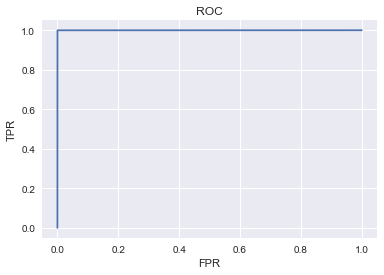

In [124]:
%matplotlib inline
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC')
plt.plot(false_positive_rate2,true_positive_rate2)

# RIDGECLASSIFIER

In [ ]:
from sklearn.linear_model import RidgeClassifier
rc = RidgeClassifier(alpha=1, normalize=True)
rc.fit(x_train, y_train)
rc_pred = rc.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,rc_pred))
print("Accuracy =",metrics.accuracy_score(y_test,rc_pred))
print("recall   =",metrics.recall_score(y_test,rc_pred))
print("precision=",metrics.precision_score(y_test,rc_pred))
print("f1_score =",metrics.f1_score(y_test,rc_pred))

In [ ]:
from sklearn.linear_model import RidgeClassifier
rc = RidgeClassifier(alpha=1,normalize=True)
rc.fit(x_train, y_train)

In [ ]:
param_rc={
    
    'max_iter':range(5,20),
    
    'normalize':[True,False],
    'tol':[1e-2,1e-4,1e-6,1e-8,1e-10]
    }

rc_grid=GridSearchCV(estimator=rc,param_grid=param_rc,cv=5,verbose=1)
rc_grid.fit(x_train,y_train)

In [ ]:
print(rc_grid.best_estimator_)
rc_grid.best_score_


In [ ]:
from sklearn.linear_model import RidgeClassifier
rct = RidgeClassifier(alpha=0.2,max_iter=5,solver='svd',random_state=9)
rct.fit(x_train, y_train)
rct_pred = rct.predict(x_test)
print(confusion_matrix(y_test,rct_pred))
print("Accuracy =",metrics.accuracy_score(y_test,rct_pred))
print("recall   =",metrics.recall_score(y_test,rct_pred))
print("precision=",metrics.precision_score(y_test,rct_pred))
print("f1_score =",metrics.f1_score(y_test,rct_pred))

In [ ]:
# GaussianNB

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test)
y_pred_pgnb= gnb.predict_proba(x_test)

gnb
confusion_matrix(y_test,y_pred_gnb)


print("Accuracy",metrics.accuracy_score(y_test,y_pred_gnb))
print("recall",metrics.recall_score(y_test,y_pred_gnb))
print("precision",metrics.precision_score(y_test,y_pred_gnb))
print("F1_score",metrics.f1_score(y_test,y_pred_gnb))


Portion of the largest variance of all features that is added to variances for calculation stability.
variance of a feature determines how much it is impacting the response variable

from sklearn.model_selection import cross_val_score
scores = cross_val_score(gnb, x_train, y_train, cv=5)
print("Average cross validation score: {:.3f}".format(scores.mean()))

from sklearn.metrics import roc_curve,roc_auc_score
probs_gnb = y_pred_pgnb[:, 1]
probs_mnb = y_pred_pmnb[:, 1]#mnb
auc1 = roc_auc_score(y_test, probs_gnb)
auc2 = roc_auc_score(y_test, probs_mnb)
print('AUC - Test Set: %.2f%%' % (auc1*100))
print('AUC - Test Set: %.2f%%' % (auc2*100))
fpr2, tpr2, thresholds2 = roc_curve(y_test, probs_gnb)
fpr3, tpr3, thresholds3 = roc_curve(y_test, probs_mnb)
plt.plot([0, 1], [0, 1], linestyle='--',color='blue')
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='GaussianNB')
plt.plot(fpr3, tpr3, linestyle='--',color='green', label='multinomialNB')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()


It is evident from the plot that the AUC for the **Guassian NB** ROC curve is higher than that for the **multinomialNB **ROC curve. Therefore, we can say that **Guassian NB** did a better job of classifying the positive class in the dataset.

**Tunning**

from sklearn.model_selection import GridSearchCV
hyper_params=[{'var_smoothing':[1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9,
                                1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}]

model_gnb=GaussianNB()

model_cv_gnb=GridSearchCV(model_gnb,
                        param_grid=hyper_params,
                        scoring='accuracy',
                        cv=5,
                        verbose=1,
                        return_train_score=True)

model_cv_gnb.fit(x_train,y_train)

cv_result_gnb=pd.DataFrame(model_cv_gnb.cv_results_)
cv_result_gnb

best_score=model_cv_gnb.best_score_
best_var_smoothing=model_cv_gnb.best_params_
print("The best test score is {0} corresponding to hyperparamter(var_smoothing) {1}".
      format(best_score,best_var_smoothing))

%matplotlib inline
plt.figure(figsize=(8,6))
plt.plot(cv_result_gnb['param_var_smoothing'],cv_result_gnb['mean_test_score'])
plt.plot(cv_result_gnb['param_var_smoothing'],cv_result_gnb['mean_train_score'])
plt.xlabel('var_smoothing')
plt.ylabel('accuracy')
plt.legend(['test_acc','train_acc'],loc='upper left')
plt.xscale('log')

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(var_smoothing=0.0001)
gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test)

print(confusion_matrix(y_test,y_pred_gnb))
print("Accuracy",metrics.accuracy_score(y_test,y_pred_gnb))
print("recall",metrics.recall_score(y_test,y_pred_gnb))
print("precision",metrics.precision_score(y_test,y_pred_gnb))
print("F1_score",metrics.f1_score(y_test,y_pred_gnb))